In [1]:
import numpy as np
from helper_MNIST import *
import random 
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from functions import *

C:\Users\fpier\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
'''
# download mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0       # data are in the range (0,255) so normalize them in (0,1)
'''

x_train = load_MNIST_images('train-images-idx3-ubyte');
y_train = load_MNIST_labels('train-labels-idx1-ubyte', True);
 
x_test = load_MNIST_images('t10k-images-idx3-ubyte');
y_test = load_MNIST_labels('t10k-labels-idx1-ubyte', True);

Number of examples: 60000
Number of rows : 28
Number of cols : 28
Number of examples: 10000
Number of rows : 28
Number of cols : 28


In [3]:
# convert labels in 2 dimensional array (1, # labels)
y_train_new = np.empty((1, y_train.size))
y_train_new[0] = y_train

y_test_new = np.empty((1, y_test.size))
y_test_new[0] = y_test

In [4]:
'''
# convert each matrix in 28x28 matrix into a matrix shape of (1, 28*28)
x_train = list(map(np.ndarray.flatten, x_train))
x_test = list(map(np.ndarray.flatten, x_test))

# convert labels in 2 dimensional array (1, # labels)
y_train_new = np.empty((1, y_train.size))
y_train_new[0] = y_train

y_test_new = np.empty((1, y_test.size))
y_test_new[0] = y_test

# the result is an array where vectors of (1,28*28) are stored in each . This is not yet a matrix
# convert them into 2D matrix shape
x_train = np.stack(x_train)
x_test = np.stack(x_test)
'''

'\n# convert each matrix in 28x28 matrix into a matrix shape of (1, 28*28)\nx_train = list(map(np.ndarray.flatten, x_train))\nx_test = list(map(np.ndarray.flatten, x_test))\n\n# convert labels in 2 dimensional array (1, # labels)\ny_train_new = np.empty((1, y_train.size))\ny_train_new[0] = y_train\n\ny_test_new = np.empty((1, y_test.size))\ny_test_new[0] = y_test\n\n# the result is an array where vectors of (1,28*28) are stored in each . This is not yet a matrix\n# convert them into 2D matrix shape\nx_train = np.stack(x_train)\nx_test = np.stack(x_test)\n'

In [5]:
'''
# transpose the matrices
x_train = np.transpose(x_train)
x_test = np.transpose(x_test)
print("Training set dimension :",x_train.shape)
print("Test set dimension :" ,x_test.shape)
'''

'\n# transpose the matrices\nx_train = np.transpose(x_train)\nx_test = np.transpose(x_test)\nprint("Training set dimension :",x_train.shape)\nprint("Test set dimension :" ,x_test.shape)\n'

In [7]:
# subset the training set keeping 100 imgs
x_train_new = x_train[:,:100]
# subset the label set
y_train_new = y_train_new[:,:100]

In [8]:
print("Training set dimension :",x_train_new.shape)
print("Test set dimension :" ,y_train_new.shape)

Training set dimension : (784, 100)
Test set dimension : (1, 100)


In [9]:
# create a NN with 4 layers - keeping Marta code
n_input     = x_train_new.shape[0]
layers_dims = [n_input, 20,1] #  2-layer model
layers_dims

[784, 20, 1]

Cost after iteration 0: 0.710849
Cost after iteration 50: 0.052049
Cost after iteration 100: 0.021535
Cost after iteration 150: 0.013008
Cost after iteration 200: 0.009284
Cost after iteration 250: 0.007270
Cost after iteration 300: 0.006029
Cost after iteration 350: 0.005199
Cost after iteration 400: 0.004611
Cost after iteration 450: 0.004175
Cost after iteration 500: 0.003843
Cost after iteration 550: 0.003581
Cost after iteration 600: 0.003372
Cost after iteration 650: 0.003202
Cost after iteration 700: 0.003062
Cost after iteration 750: 0.002945
Cost after iteration 800: 0.002846
Cost after iteration 850: 0.002762
Cost after iteration 900: 0.002690
Cost after iteration 950: 0.002629


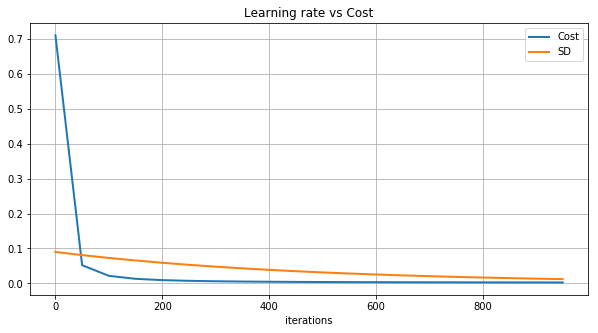

In [10]:
parameters, lr = L_layer_model(x_train_new, 
                               y_train_new, 
                               layers_dims,
                               learning_rate_type = "SD",             # SD (step decay), exponential, 1/t. If None fixed learning rate as default
                               learning_rate_value = 0.1,             # step decay param
                               learning_rate_decrease_rate = 0.1,     # step decay param
                               learning_rate_interval_decrease = 50,  # step decay param
                               #starting_learning_rate = 0.1,         # exponential/ (1/t) decay param
                               #k = 0.001,                            # exponential/ (1/t) decay param
                               num_iterations = 1000, 
                               print_cost = True)

In [11]:
list(lr.values())

[0.09,
 0.081,
 0.0729,
 0.06561,
 0.059049000000000004,
 0.0531441,
 0.04782969,
 0.043046721,
 0.038742048900000006,
 0.03486784401,
 0.031381059609000006,
 0.028242953648100005,
 0.025418658283290006,
 0.022876792454961006,
 0.020589113209464906,
 0.018530201888518415,
 0.016677181699666574,
 0.015009463529699917,
 0.013508517176729925,
 0.012157665459056933]

In [12]:
# subset the training set keeping 100 imgs
x_test_new = x_test[:,:100]
# subset the label set
y_test_new = y_test_new[:,:100]

In [13]:
print("Test set dimension :",x_test_new.shape)
print("Test set dimension :" ,y_test_new.shape)

Test set dimension : (784, 100)
Test set dimension : (1, 100)


In [14]:
pred_test = predict(x_test_new, y_test_new, parameters)

Accuracy: 0.98
